In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas

dataset = pandas.read_csv('PEV2.csv')

dataset = dataset.drop(columns=['Timestamp', 
                               'Do you have any notes about the design of the site? If not, please enter N/A',
                               'Do you have any notes on the login experience? If not, please enter N/A',
                               'Do you have any notes on other functionality? If not, please enter N/A',
                               'Do you have any notes on other functionality? If not, please enter N/A',
                               'Did you have any other issues with the website? If not, please enter N/A',
                               'Do you have any notes about the layout of the site? If not, please enter N/A'])

dataset

,The system design affords good visibility of system,The presentation of information and objects in the system resembles how things are in the real world,The system allows the user to maintain control and provides the user with freedom to do what is needed,The system's design is consistent with how other software is designed,The system has mechanisms in place to help me not make mistakes when using it.,I can figure out what needs to be done in the system even if I can't remmeber exactly what the commands are.,"To complete a task in the system, I have a choice in the commands I use.","The design of the system is simple, clear, and aesthetically pleasing."
0,Agree,Strongly agree,Agree,Agree,Neutral,Agree,Agree,Strongly agree
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Strongly agree
2,Agree,Agree,Agree,Neutral,Agree,Neutral,Neutral,Agree
3,Agree,Agree,Neutral,Agree,Agree,Agree,Neutral,Agree
4,Agree,Neutral,Agree,Agree,Neutral,Disagree,Disagree,Agree
5,Agree,Disagree,Agree,Neutral,Disagree,Neutral,Disagree,Agree
6,Strongly agree,Agree,Strongly agree,Strongly agree,Neutral,Agree,Neutral,Agree
7,Agree,Agree,Agree,Disagree,Neutral,Agree,Strongly agree,Neutral


In [2]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

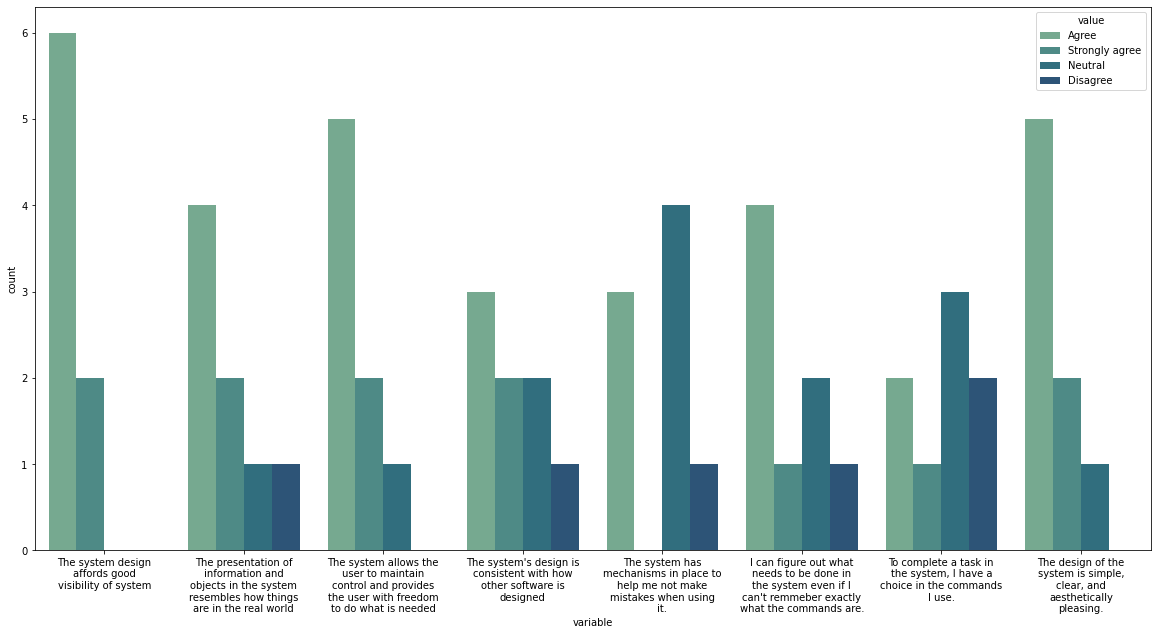

In [3]:
df = pandas.melt(dataset)

plt.figure(figsize=(20,10))

outputPlot = sns.countplot(data=df.loc[df['value']!="NO"], x='variable', hue='value', palette="crest")

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

wrap_labels(outputPlot, 22)

In [4]:
avg = {}

for col_name, data in dataset.items():
    count = 0
    for i in range(0,8):
        if data[i].lower() == "strongly agree":
            count += 5
        elif data[i].lower() == "agree":
            count += 4
        elif data[i].lower() == "neutral":
            count += 3
        elif data[i].lower() == "disagree":
            count += 2
        elif data[i].lower() == "strongly disagree":
            count += 1
        else:
            pass
    avg[col_name] = count/8

    
avg

{'The system design affords good visibility of system': 4.25,
 'The presentation of information and objects in the system resembles how things are in the real world': 3.875,
 'The system allows the user to maintain control and provides the user with freedom to do what is needed': 4.125,
 "The system's design is consistent with how other software is designed": 3.75,
 'The system has mechanisms in place to help me not make mistakes when using it.': 3.25,
 "I can figure out what needs to be done in the system even if I can't remmeber exactly what the commands are.": 3.625,
 'To complete a task in the system, I have a choice in the commands I use.': 3.25,
 'The design of the system is simple, clear, and aesthetically pleasing.': 4.125}

(1.0, 5.0)

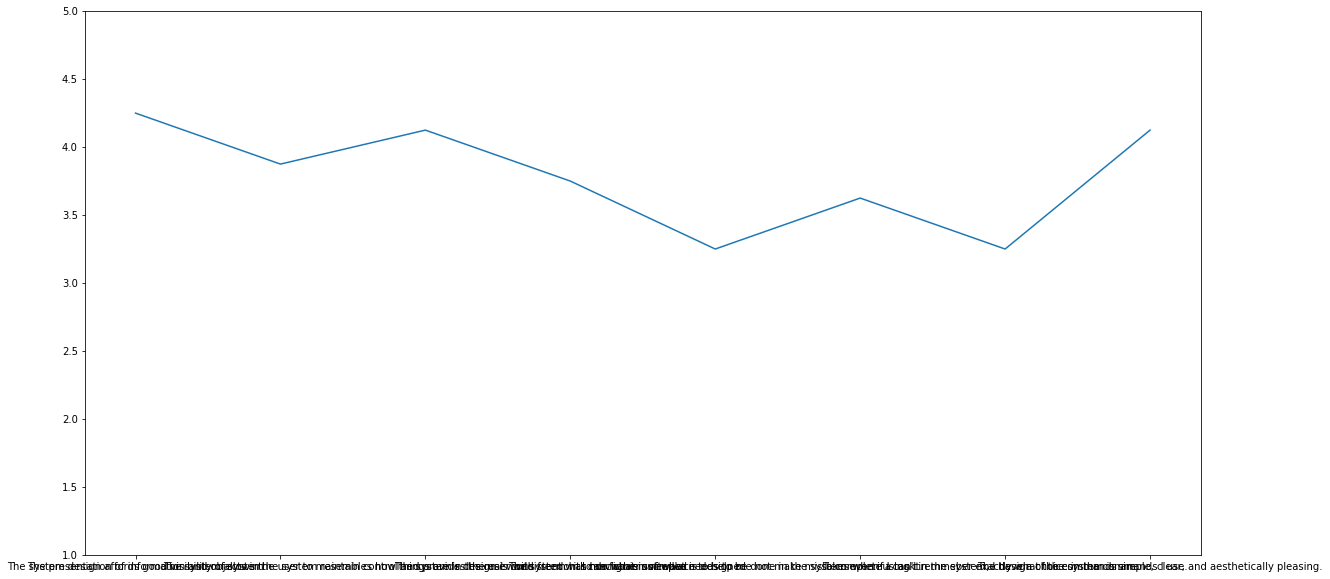

In [5]:
keys = list(avg.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(avg[k]) for k in keys]

plt.figure(figsize=(20,10))

sns.lineplot(x=keys, y=vals)

plt.ylim(1, 5)

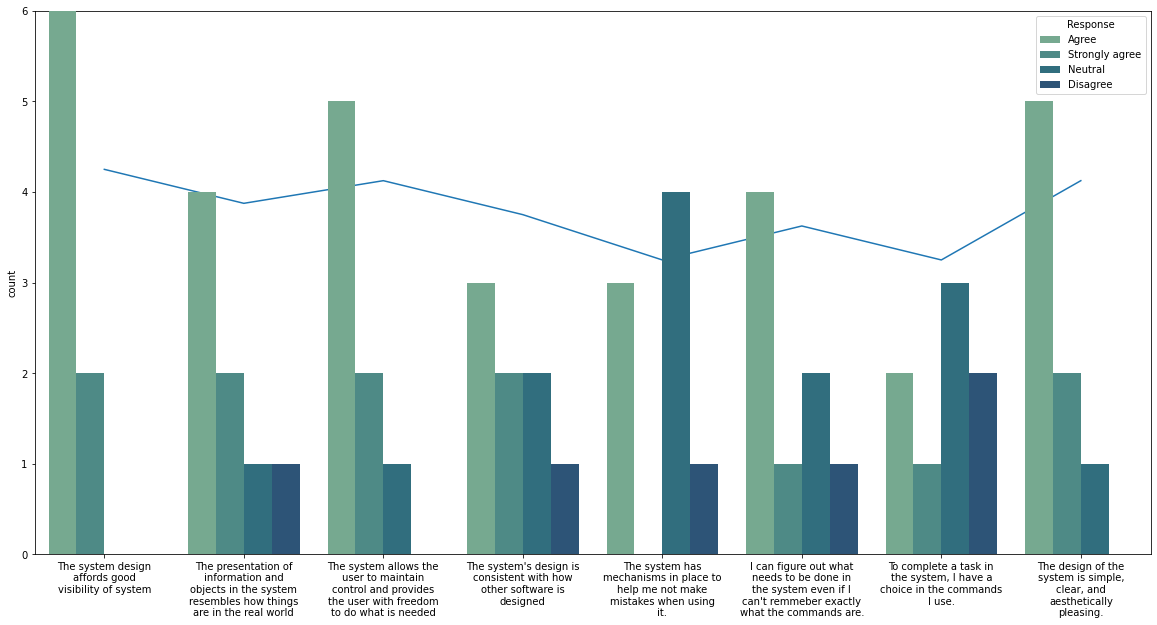

In [9]:
df = pandas.melt(dataset)

fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(x=keys, y=vals, ax=ax, zorder=100, alpha=0.5)

plt.ylim(3, 5)

outputPlot = sns.countplot(data=df.loc[df['value']!="NO"], x='variable', hue='value', palette="crest", ax=ax, zorder=200)

plt.ylim(0, 6)

wrap_labels(outputPlot, 22)

ax.set(xlabel=None)

keys = list(avg.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(avg[k]) for k in keys]

plt.legend(title='Response', loc='upper right')
